## Anatomy of a neural network

Training a neural network revolves around the following objects:
* Layers, which are combined into a network (or model)
* The input data and corresponding targets
* The loss function, which defines the feedback signal used for learning
* The optimizer, which determines how learning proceeds

![](img/03_01.png "Relationship between the network, layers, loss function, and optimizer")

### Layers: the building blocks of deep learning

A layer is a data-processing module that takes as input one or
more tensors and that outputs one or more tensors. Different layers are appropriate for different tensor formats and different types of data
processing. For instance, simple vector data, stored in 2D tensors of shape `(samples, features)`, is often processed by densely connected layers, also called fully connected or dense
layers (the `Dense` class in Keras). Sequence data, stored in 3D tensors of shape `(samples, timesteps, features)`, is typically processed by recurrent layers such as an `LSTM` layer.
Image data, stored in 4D tensors, is usually processed by 2D convolution layers (`Conv2D`)

In [1]:
from keras import layers
layer = layers.Dense(32, input_shape=(784,))

We’re creating a layer that will only accept as input 2D tensors where the first dimension is 784 (axis 0, the batch dimension, is unspecified, and thus any value would be
accepted). This layer will return a tensor where the first dimension has been transformed to be 32.
Thus this layer can only be connected to a downstream layer that expects 32-
dimensional vectors as its input. 

When using Keras, you don’t have to worry about
compatibility, because the layers you add to your models are dynamically built to
match the shape of the incoming layer.

In [2]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(32, input_shape=(784,)))
model.add(layers.Dense(32))

The second layer didn’t receive an input shape argument—instead, it automatically
inferred its input shape as being the output shape of the layer that came before.

### Models: networks of layers

A deep-learning model is a directed, acyclic graph of layers. The most common
instance is a linear stack of layers, mapping a single input to a single output. However, these are not the only way to stack layers. Some common ones include the following:
* Two-branch networks
* Multihead networks
* Inception blocks

The topology of a network defines a *hypothesis space*. machine learning can be defined as something “searching for useful representations of some
input data, within a predefined space of possibilities, using guidance from a feedback
signal.” By choosing a network topology, you constrain your space of possibilities.

### Loss functions and optimizers

Once the network architecture is defined, you still have to choose two more things:
* Loss function (objective function)—The quantity that will be minimized during
training. It represents a measure of success for the task at hand.
* Optimizer—Determines how the network will be updated based on the loss function. It implements a specific variant of stochastic gradient descent (SGD).

A neural network that has multiple outputs may have multiple loss functions (one per
output). But the gradient-descent process must be based on a single scalar loss value;
so, for multiloss networks, all losses are combined (via averaging) into a single scalar
quantity.

When it comes to common problems such as classification, regression,
and sequence prediction, there are simple guidelines you can follow to choose the
correct loss. For instance, you’ll use binary crossentropy for a two-class classification
problem, categorical crossentropy for a many-class classification problem, meansquared error for a regression problem, connectionist temporal classification (CTC)
for a sequence-learning problem.

## Introduction to Keras

Keras has the following key features:
* It allows the same code to run seamlessly on CPU or GPU.
* It has a user-friendly API that makes it easy to quickly prototype deep-learning
models.
* It has built-in support for convolutional networks (for computer vision), recurrent networks (for sequence processing), and any combination of both.
* It supports arbitrary network architectures: multi-input or multi-output models,
layer sharing, model sharing, and so on. This means Keras is appropriate for
building essentially any deep-learning model, from a generative adversarial network to a neural Turing machine.

### Keras, TensorFlow, Theano, and CNTK

Keras is a model-level library, providing high-level building blocks for developing
deep-learning models. It doesn’t handle low-level operations such as tensor manipulation and differentiation. Instead, it relies on a specialized, well-optimized tensor
library to do so, serving as the backend engine of Keras. Rather than choosing a single
tensor library and tying the implementation of Keras to that library, Keras handles the
problem in a modular way (see figure 3.3); thus several different backend engines can
be plugged seamlessly into Keras. Currently, the three existing backend implementations are the TensorFlow backend, the Theano backend, and the Microsoft Cognitive
Toolkit (CNTK) backend.

Via TensorFlow (or Theano, or CNTK), Keras is able to run seamlessly on both
CPUs and GPUs. When running on CPU, TensorFlow is itself wrapping a low-level
library for tensor operations called Eigen (http://eigen.tuxfamily.org). On GPU,
TensorFlow wraps a library of well-optimized deep-learning operations called the
NVIDIA CUDA Deep Neural Network library (cuDNN).

### Developing with Keras: a quick overview

A typical Keras workflow looks like this:
1. Define your training data: input tensors and target tensors.
2. Define a network of layers (or model ) that maps your inputs to your targets.
3. Configure the learning process by choosing a loss function, an optimizer, and
some metrics to monitor.
4. Iterate on your training data by calling the fit() method of your model.

There are two ways to define a model: using the `Sequential` class (only for linear
stacks of layers, which is the most common network architecture by far) or the functional API (for directed acyclic graphs of layers, which lets you build completely arbitrary architectures).

Here’s a two-layer model defined using the `Sequential` class.

In [8]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))

And here’s the same model defined using the functional API:

In [4]:
input_tensor = layers.Input(shape=(784,))
x = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)
model = models.Model(inputs=input_tensor, outputs=output_tensor)

Once your model architecture is defined, it doesn’t matter whether you used a
`Sequential` model or the functional API. All of the following steps are the same.

The learning process is configured in the compilation step, where you specify the
optimizer and loss function(s) that the model should use, as well as the metrics you
want to monitor during training. Here’s an example with a single loss function, which
is by far the most common case:

In [12]:
model.compile(optimizer='adam',
loss='mse',
metrics=['accuracy'])

Finally, the learning process consists of passing Numpy arrays of input data (and the
corresponding target data) to the model via the `fit()` method.

In [ ]:
model.fit(input_tensor, output_tensor, batch_size=128, epochs=10)

## Classifying movie reviews: a binary classification example

### The IMDB dataset

We’ll work with the IMDB dataset: a set of 50,000 highly polarized reviews from the
Internet Movie Database. They’re split into 25,000 reviews for training and 25,000
reviews for testing, each set consisting of 50% negative and 50% positive reviews.

Just like the MNIST dataset, the IMDB dataset comes packaged with Keras. It has
already been preprocessed: the reviews (sequences of words) have been turned into
sequences of integers, where each integer stands for a specific word in a dictionary. 

Let's load the dataset.

In [13]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

17473536/17464789 [==============================] - 2s 0us/step


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\harik\anaconda3\lib\site-packages\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\harik\anaconda3\lib\site-packages\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype

The argument `num_words=10000` means you’ll only keep the top 10,000 most frequently occurring words in the training data. Rare words will be discarded. This allows
you to work with vector data of manageable size.

In [18]:
# train_data[0]

Here’s how you can quickly decode one of these reviews back to English
words:

In [22]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

>Note that the indices are offset by 3 because 0, 1, and 2 are reserved
indices for “padding,” “start of sequence,” and “unknown.”

In [25]:
max([max(sequence) for sequence in train_data])

9999

### Preparing the data

You can’t feed lists of integers into a neural network. You have to turn your lists into
tensors. There are two ways to do that:
* Pad your lists so that they all have the same length, turn them into an integer
tensor of shape `(samples, word_indices)`, and then use as the first layer in
your network a layer capable of handling such integer tensors (the Embedding
layer, which we’ll cover in detail later in the book).
* One-hot encode your lists to turn them into vectors of 0s and 1s. This would
mean, for instance, turning the sequence [3, 5] into a 10,000-dimensional vector that would be all 0s except for indices 3 and 5, which would be 1s. Then you
could use as the first layer in your network a `Dense` layer, capable of handling
floating-point vector data.

Let’s go with the latter solution to vectorize the data

In [26]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
    
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [33]:
x_train[0], len(x_train[0])

(array([0., 1., 1., ..., 0., 0., 0.]), 10000)

We should also vectorize your labels, which is straightforward:

In [34]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### Building The Network

The input data is vectors, and the labels are scalars (1s and 0s): A type of network that performs well on such a problem is
a simple stack of fully connected (`Dense`) layers with relu activations: `Dense(16,
activation='relu')`.

The argument being passed to each Dense layer (16) is the number of hidden
units of the layer. We know that ach such Dense layer with a relu activation
implements the following chain of tensor operations:

`output = relu(dot(W, input) + b)`

Having 16 hidden units means the weight matrix W will have shape `(input_dimension,
16)` the dot product with W will project the input data onto a 16-dimensional representation space (and then you’ll add the bias vector b and apply the relu operation).

There are two key architecture decisions to be made about such a stack of Dense layers:
* How many layers to use
* How many hidden units to choose for each layer

Here, we'll use the following architecture choice:
* Two intermediate layers with 16 hidden units each
* A third layer that will output the scalar prediction regarding the sentiment of
the current review

![](img/03_02.png)

In [35]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Next step is compiling the model. We'll use the `rmsprop` optimizer and the `binary_crossentropy` loss function.

In [40]:
model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc'])

### Validating your approach

In order to monitor during training the accuracy of the model on data it has never
seen before, you’ll create a validation set by setting apart 10,000 samples from the
original training data.

In [37]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

We'll now train the model for 20 `epochs` (20 iterations over all samples in the
`x_train` and `y_train` tensors), in mini-batches of 128 samples. At the same time,
you’ll monitor loss and accuracy on the 10,000 samples that you set apart. You do so by
passing the validation data as the `validation_data` argument.

In [41]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=156,
                    validation_data=(x_val, y_val))

Epoch 1/20
97/97 [==============================] - 13s 88ms/step - loss: 0.4973 - acc: 0.7739 - val_loss: 0.3126 - val_acc: 0.8721
Epoch 2/20
97/97 [==============================] - 3s 33ms/step - loss: 0.2160 - acc: 0.9234 - val_loss: 0.2763 - val_acc: 0.8869
Epoch 3/20
97/97 [==============================] - 3s 34ms/step - loss: 0.1469 - acc: 0.9509 - val_loss: 0.3315 - val_acc: 0.8766
Epoch 4/20
97/97 [==============================] - 4s 38ms/step - loss: 0.1084 - acc: 0.9632 - val_loss: 0.3364 - val_acc: 0.8785
Epoch 5/20
97/97 [==============================] - 4s 37ms/step - loss: 0.0806 - acc: 0.9738 - val_loss: 0.3740 - val_acc: 0.8782
Epoch 6/20
97/97 [==============================] - 4s 37ms/step - loss: 0.0584 - acc: 0.9826 - val_loss: 0.4198 - val_acc: 0.8731
Epoch 7/20
97/97 [==============================] - 3s 33ms/step - loss: 0.0480 - acc: 0.9855 - val_loss: 0.4788 - val_acc: 0.8724
Epoch 8/20
97/97 [==============================] - 4s 36ms/step - loss: 0.0333 - 

Note that the call to model.fit() returns a History object. This object has a member history, which is a dictionary containing data about everything that happened
during training.

Let’s use `Matplotlib` to plot
the training and validation loss side by side 

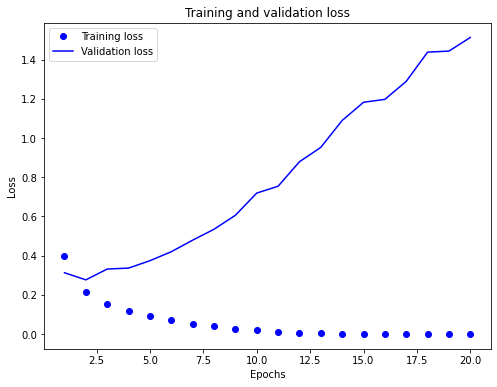

In [45]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.figure(figsize=(8,6))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

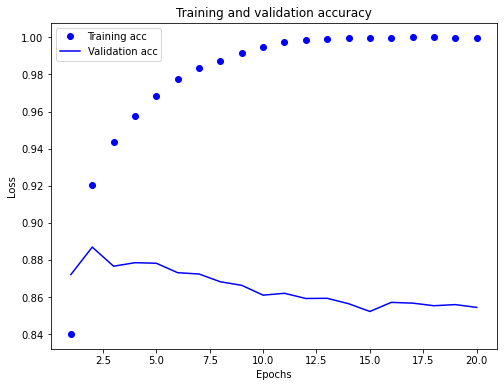

In [46]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.figure(figsize=(8,6))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

We can see that the validation loss is increasing at every epoch, which means that the model is overfitting the training data. To prevent this, we could stop training after three epochs. In
general, you can use a range of techniques to mitigate overfitting.

Let’s train a new network from scratch for four epochs and then evaluate it on the
test data.

In [47]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
            loss='binary_crossentropy',
            metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 6s 19ms/step - loss: 0.5452 - accuracy: 0.7355
Epoch 2/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2698 - accuracy: 0.9120
Epoch 3/4
49/49 [==============================] - ETA: 0s - loss: 0.1966 - accuracy: 0.93 - 1s 14ms/step - loss: 0.1967 - accuracy: 0.9334
Epoch 4/4
782/782 [==============================] - 10s 2ms/step - loss: 0.2934 - accuracy: 0.8838


In [48]:
results

[0.2933957278728485, 0.8838000297546387]

Even this simple model gives 88% of accuracy on the test data.

### Using a trained network to generate predictions on new data

After having trained a network, you’ll want to use it in a practical setting. You can generate the likelihood of reviews being positive by using the `predict` method:

In [49]:
model.predict(x_test)

array([[0.21960971],
       [0.99934053],
       [0.8197083 ],
       ...,
       [0.1041958 ],
       [0.08808681],
       [0.5569736 ]], dtype=float32)

## Classifying newswires: a multiclass classification example

In this section, we’ll build a network to classify Reuters newswires into 46 mutually
exclusive topics. Because we have many classes, this problem is an instance of *multiclass classification*; and because each data point should be classified into only one category, the problem is more specifically an instance of *single-label, multiclass classification*.
If each data point could belong to multiple categories (in this case, topics), we’d be
facing a *multilabel, multiclass classification* problem.

### The Reuters dataset

You’ll work with the Reuters dataset, a set of short newswires and their topics, published
by Reuters in 1986. It’s a simple, widely used toy dataset for text classification. There
are 46 different topics; some topics are more represented than others, but each topic
has at least 10 examples in the training set.

Like IMDB and MNIST, the Reuters dataset comes packaged as part of Keras.

In [50]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


C:\Users\harik\anaconda3\lib\site-packages\keras\datasets\reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\harik\anaconda3\lib\site-packages\keras\datasets\reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


As with the IMDB dataset, the argument num_words=10000 restricts the data to the
10,000 most frequently occurring words found in the data.

In [51]:
len(train_data), len(test_data)

(8982, 2246)

As with the IMDB reviews, each example is a list of integers.

In [53]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
        train_data[0]])

565248/550378 [==============================] - 0s 0us/step


In [54]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

### Preparing the data

We can vectorize the data with the exact same code as in the previous example


In [55]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
    
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

To vectorize the labels, there are two possibilities: you can cast the label list as an integer tensor, or you can use one-hot encoding. One-hot encoding is a widely used format for categorical data, also called categorical encoding. 

In [58]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [59]:
one_hot_train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

The same can also be done by using `Keras`'s `to_categorical` function.

In [60]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

### Building The Network

The problem is quite similar to the one we solved in the previous section, with one change. Now, we have 46 classes instead of 2. In the previous
example, we used 16-dimensional intermediate layers, but a 16-dimensional space may
be too limited to learn to separate 46 different classes: such small layers may act as information bottlenecks, permanently dropping relevant information.

For this reason we’ll use larger layers. Let’s go with 64 units.

In [61]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

There are two other things we should note about this architecture:
* We end the network with a Dense layer of size 46. This means for each input
sample, the network will output a 46-dimensional vector. Each entry in this vector (each dimension) will encode a different output class.
* The last layer uses a softmax activation. It means the network will output a probability distribution over the 46
different output classes—for every input sample, the network will produce a 46-
dimensional output vector, where `output[i]` is the probability that the sample
belongs to class i. The 46 scores will sum to 1.

The best loss function to use in this case is *categorical_crossentropy*. It measures
the distance between two probability distributions: here, between the probability distribution output by the network and the true distribution of the labels.

In [62]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

### Validating your approach

In [63]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [64]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 9s 245ms/step - loss: 3.0872 - accuracy: 0.3923 - val_loss: 1.6817 - val_accuracy: 0.6360
Epoch 2/20
16/16 [==============================] - 3s 171ms/step - loss: 1.4641 - accuracy: 0.6883 - val_loss: 1.2806 - val_accuracy: 0.7200
Epoch 3/20
16/16 [==============================] - 3s 179ms/step - loss: 1.0477 - accuracy: 0.7680 - val_loss: 1.1049 - val_accuracy: 0.7680
Epoch 4/20
16/16 [==============================] - 3s 201ms/step - loss: 0.7958 - accuracy: 0.8259 - val_loss: 1.0076 - val_accuracy: 0.7800
Epoch 5/20
16/16 [==============================] - 3s 178ms/step - loss: 0.6382 - accuracy: 0.8675 - val_loss: 0.9399 - val_accuracy: 0.8050
Epoch 6/20
16/16 [==============================] - 3s 188ms/step - loss: 0.5044 - accuracy: 0.8964 - val_loss: 0.9094 - val_accuracy: 0.8090
Epoch 7/20
16/16 [==============================] - 3s 181ms/step - loss: 0.3943 - accuracy: 0.9170 - val_loss: 0.9009 - val_accuracy: 0.8170
Epoch 

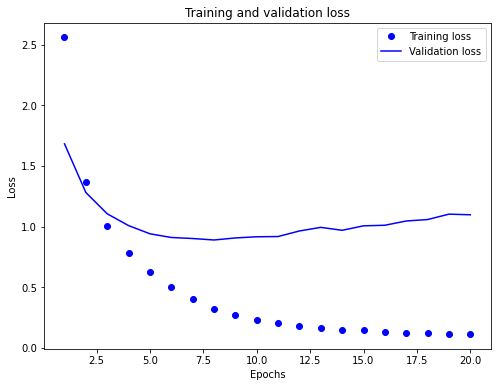

In [65]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure(figsize=(8,6))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

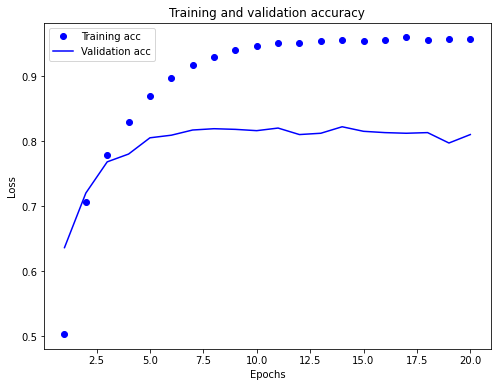

In [68]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.figure(figsize=(8,6))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The network begins to overfit after nine epochs. Let’s train a new network from
scratch for nine epochs and then evaluate it on the test set.

In [70]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

model.fit(partial_x_train,
        partial_y_train,
        epochs=9,
        batch_size=512,
        validation_data=(x_val, y_val))
        
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 10s 223ms/step - loss: 3.0193 - accuracy: 0.4153 - val_loss: 1.6671 - val_accuracy: 0.6460
Epoch 2/9
16/16 [==============================] - 3s 168ms/step - loss: 1.4341 - accuracy: 0.7050 - val_loss: 1.3113 - val_accuracy: 0.7070
Epoch 3/9
16/16 [==============================] - 3s 171ms/step - loss: 1.0684 - accuracy: 0.7762 - val_loss: 1.1649 - val_accuracy: 0.7520
Epoch 4/9
16/16 [==============================] - 3s 165ms/step - loss: 0.8464 - accuracy: 0.8211 - val_loss: 1.0724 - val_accuracy: 0.7700
Epoch 5/9
16/16 [==============================] - 3s 168ms/step - loss: 0.6490 - accuracy: 0.8607 - val_loss: 0.9973 - val_accuracy: 0.8010
Epoch 6/9
16/16 [==============================] - 3s 168ms/step - loss: 0.5382 - accuracy: 0.8881 - val_loss: 0.9596 - val_accuracy: 0.8060
Epoch 7/9
16/16 [==============================] - 3s 167ms/step - loss: 0.4274 - accuracy: 0.9157 - val_loss: 0.9518 - val_accuracy: 0.8090
Epoch 8/9
16

In [71]:
results

[1.0186514854431152, 0.7827248573303223]

In [72]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.1834372217275156

Since a random guess gives accuracy of 18%, our model, which gives 78% of accuray is performing very well.

### Generating predictions on new data

In [74]:
prediction0 = model.predict(np.expand_dims(x_test[0], axis=0))

In [77]:
prediction0[0]

array([1.53707020e-04, 7.82380666e-05, 1.09479006e-04, 7.43406236e-01,
       2.32027933e-01, 1.16205692e-05, 4.48423416e-05, 7.49236380e-04,
       1.25298428e-03, 1.24751023e-05, 5.42055524e-04, 3.06184893e-03,
       2.73188896e-04, 2.22313349e-04, 2.35978820e-04, 9.08611866e-04,
       4.44821344e-04, 1.20923575e-03, 1.67490027e-04, 1.38760847e-03,
       7.84106180e-03, 1.35236315e-03, 7.40116739e-05, 2.13318039e-04,
       7.45167927e-05, 5.34189421e-05, 1.96745823e-04, 1.56155165e-05,
       1.38474978e-04, 7.49799714e-04, 5.94264537e-04, 1.11362460e-04,
       1.54426380e-04, 3.99279052e-05, 6.06514368e-05, 2.00692375e-05,
       2.88521027e-04, 1.04198349e-04, 3.01226857e-04, 1.19508384e-03,
       6.50576067e-06, 3.97467229e-05, 7.23653784e-06, 5.48746430e-05,
       4.42720693e-06, 8.21418325e-06], dtype=float32)

In [78]:
len(prediction0[0])

46

In [80]:
prediction0[0].max(), np.argmax(prediction0[0])

(0.74340624, 3)

### A different way to handle the labels and the loss

Another way to encode the labels would be to cast them as
an integer tensor, like this:

In [81]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

The only thing this approach would change is the choice of the loss function. The loss
function used previous, `categorical_crossentropy`, expects the labels to follow
a categorical encoding. With integer labels, you should use `sparse_categorical_
crossentropy`:

In [83]:
model.compile(optimizer='rmsprop',
                loss='sparse_categorical_crossentropy',
                metrics=['acc'])

>This new loss function is still mathematically the same as `categorical_crossentropy`;
it just has a different interface.

## Predicting house prices: a regression example

### The Boston Housing Price dataset

The dataset you’ll use has an interesting difference
from the two previous examples. It has relatively few data points: only 506, split
between 404 training samples and 102 test samples. And each feature in the input data
(for example, the crime rate) has a different scale. For instance, some values are proportions, which take values between 0 and 1; others take values between 1 and 12, others between 0 and 100, and so on.

In [84]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [86]:
train_data.shape, test_data.shape

((404, 13), (102, 13))

The targets are the median values of owner-occupied homes, in thousands of
dollars:

In [87]:
test_targets

array([ 7.2, 18.8, 19. , 27. , 22.2, 24.5, 31.2, 22.9, 20.5, 23.2, 18.6,
       14.5, 17.8, 50. , 20.8, 24.3, 24.2, 19.8, 19.1, 22.7, 12. , 10.2,
       20. , 18.5, 20.9, 23. , 27.5, 30.1,  9.5, 22. , 21.2, 14.1, 33.1,
       23.4, 20.1,  7.4, 15.4, 23.8, 20.1, 24.5, 33. , 28.4, 14.1, 46.7,
       32.5, 29.6, 28.4, 19.8, 20.2, 25. , 35.4, 20.3,  9.7, 14.5, 34.9,
       26.6,  7.2, 50. , 32.4, 21.6, 29.8, 13.1, 27.5, 21.2, 23.1, 21.9,
       13. , 23.2,  8.1,  5.6, 21.7, 29.6, 19.6,  7. , 26.4, 18.9, 20.9,
       28.1, 35.4, 10.2, 24.3, 43.1, 17.6, 15.4, 16.2, 27.1, 21.4, 21.5,
       22.4, 25. , 16.6, 18.6, 22. , 42.8, 35.1, 21.5, 36. , 21.9, 24.1,
       50. , 26.7, 25. ])

### Preparing the data

It would be problematic to feed into a neural network values that all take wildly different ranges. For this, we’ll normalize the data.

In [88]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

Note that this can also be done using some other preprocessing functions.

### Building your network

Because so few samples are available, you’ll use a very small network with two hidden
layers, each with 64 units. In general, the less training data you have, the worse overfitting will be, and using a small network is one way to mitigate overfitting.

In [89]:
from keras import models
from keras import layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
    input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

We are making a function to build model because we'll need to instantiate
the same model multiple times.

### Validating your approach using K-fold validation

To evaluate your network while you keep adjusting its parameters (such as the number
of epochs used for training), you could split the data into a training set and a validation set, as you did in the previous examples. But because you have so few data points,
the validation set would end up being very small (for instance, about 100 examples).
As a consequence, the validation scores might change a lot depending on which data
points you chose to use for validation and which you chose for training: the validation
scores might have a high variance with regard to the validation split. This would prevent you from reliably evaluating your model.

The best practice in such situations is to use K-fold cross-validation.
It consists of splitting the available data into K partitions (typically K = 4 or 5), instantiating K identical models, and training each one on K – 1 partitions while evaluating on
the remaining partition. The validation score for the model used is then the average of
the K validation scores obtained. 

In [90]:
import numpy as np
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
        epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


Off course, the same can be done using sklearn’s `cross_validation` module.

In [92]:
all_scores, np.mean(all_scores)

([2.775895833969116, 2.4789512157440186, 2.646538496017456, 2.323712110519409],
 2.5562744140625)

Let’s try training the network a bit longer: 200 epochs. To keep a record of how
well the model does at each epoch, you’ll modify the training loop to save the perepoch validation score log.

In [101]:
num_epochs = 200
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]],
        axis=0)

    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
        validation_data=(val_data, val_targets),
        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


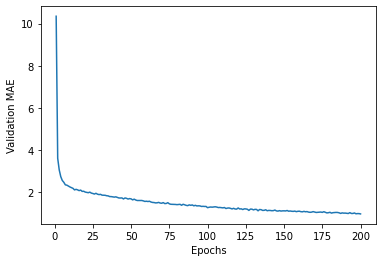

In [102]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()